## 0. Import Libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from xclim import sdba
from glob import glob
from shapely.geometry import mapping

import xclim
import utils


%load_ext autoreload
%autoreload 2
%reload_ext autoreload

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## 1. Open Data

In [2]:
# change if needed
bias_algo = 'QDM_era5land' # EQM or QDM
season = 'DJF' # DJF or JJA
time_frame = '208101_210012' # 206101_208012 or 208101_210012 for proj or 198501_200512 for reference

path_general = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'
path_coeff = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/data/bias_correction'

### 1.1 Model

In [3]:
# burada yıl ayarı
year_range = np.arange(int(time_frame[0:4]), 
                       int(time_frame[7:11])+1)
yearly_paths = glob(fr'{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr*')
yearly_paths = [expected_path for expected_path in yearly_paths 
                              if int(expected_path[-7:-3]) >= int(time_frame[0:4]) 
                              and int(expected_path[-7:-3]) <= int(time_frame[7:11])

               ]
yearly_paths

['/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2081.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2082.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2083.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2084.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2085.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2086.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2087.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2088.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM

### 1.2 Change 0 values

In [4]:
wet_hour_mm = 0.1

for year, year_path in enumerate(yearly_paths):
    
    # open data
    dt_model = xr.open_dataset(year_path)
    
    print('data open')
    
    # adjust model values below threshold to 0 (burayı ayrı bir yerde yap)
    dt_model['scen'] = dt_model['scen'].where(dt_model['scen']>wet_hour_mm, 
                                        0
                                       )

    dt_model.to_netcdf(fr"{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr_zeroed_{year_range[year]}.nc",
                              )
    
    print(year_path)

data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2081.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2082.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2083.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2084.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2085.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2086.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2087.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_2088.nc
data open
/mnt/e/Jupyter

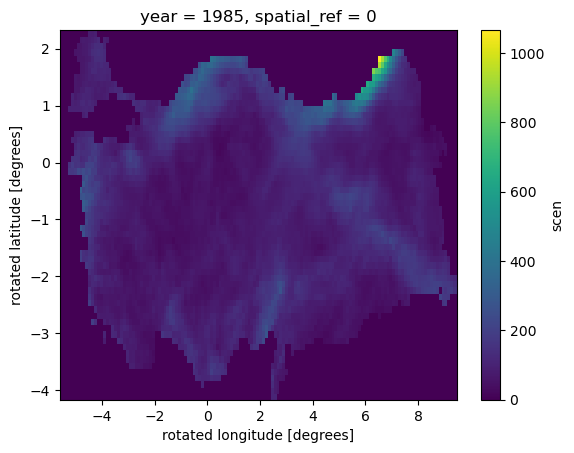

In [5]:
# # 2100 JJA
dt_model['scen'].transpose('time', 'rlat', 'rlon').sum(dim='time').plot()

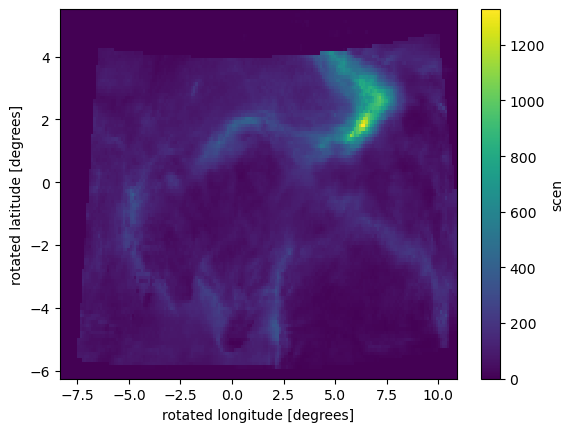

In [8]:
# # 2100 DJF
dt_model['scen'].transpose('time', 'rlat', 'rlon').sum(dim='time').plot()

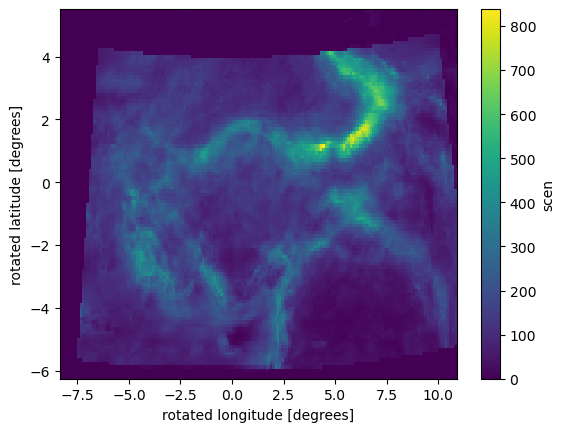

In [6]:
# # 2080 DJF
dt_model['scen'].transpose('time', 'rlat', 'rlon').sum(dim='time').plot()

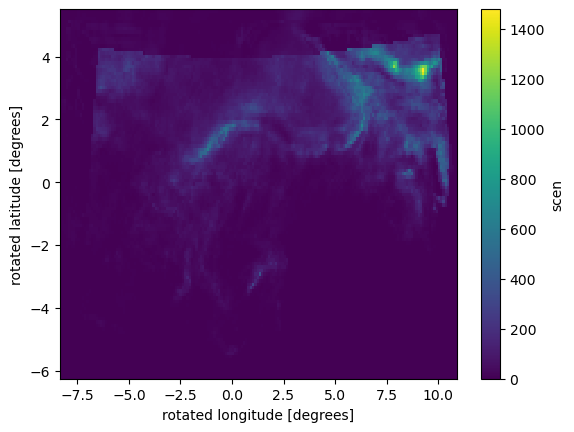

In [5]:
# check the data
dt_model['scen'].transpose('time', 'rlat', 'rlon').sum(dim='time').plot()